In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
plt.style.use("ggplot")

# Creating sample data
We create sample data with years (2010 - 2020), sales data and create another arrays where we can use our model on.

In [4]:
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

sales = [2000, 2250, 2800, 2850, 3542, 3707, 5556, 8544, 8555, 9100, 12000]

prediction = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030] 

years

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

#### Currently all arrays are 1-dimensional Arrays, but Sklearn expects 2-d Arrays when building a model.

In [5]:
np_years = np.array(years).reshape(-1, 1)

np_sales = np.array(sales).reshape(-1, 1)

np_prediction = np.array(prediction).reshape(-1, 1)

years

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

# Linear Regression

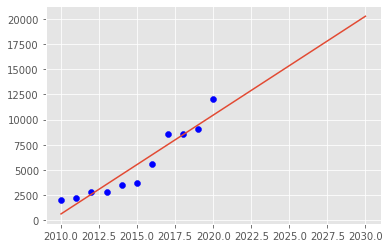

In [6]:
# plotting
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(np_years, np_sales)

plt.scatter(years, sales, color = "blue")
plt.plot(prediction, lr.predict(np_prediction));

In [7]:
for number in [2020, 2025, 2030]:
    val = lr.predict(np.array(number).reshape(-1, 1))[0]
    
    txt = f"Prediction for year {number}: {int(val)}"
    
    if number in years:
        txt += f"- Real Value: {sales[years.index(number)]}"
    
    print(txt)

Prediction for year 2020: 10448- Real Value: 12000
Prediction for year 2025: 15361
Prediction for year 2030: 20273


# Polynomial Regression

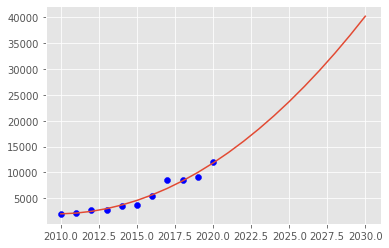

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# POLYNOMIAL MODEL
poly = PolynomialFeatures()
poly_years = poly.fit_transform(np_years)
poly.fit(poly_years, sales)

# LINEAR MODEL
lr = LinearRegression()
lr.fit(poly_years, sales)


plt.scatter(years, sales, color = "blue")
plt.plot(prediction, lr.predict(poly.fit_transform(np_prediction)));

In [9]:
for number in [2020, 2025, 2030]:
    val = lr.predict(poly.fit_transform(np.array(number).reshape(-1, 1)))[0]
    
    txt = f"Prediction for year {number}: {int(val)}"
    
    if number in years:
        txt += f"- Real Value: {sales[years.index(number)]}"
    
    print(txt)

Prediction for year 2020: 11837- Real Value: 12000
Prediction for year 2025: 23692
Prediction for year 2030: 40176


# Decision Tree Regression

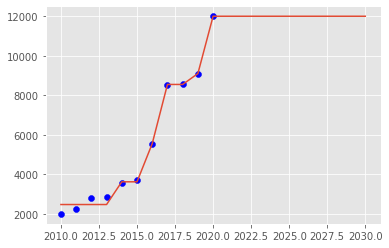

In [10]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# DECISION TREE MODEL
regressor = DecisionTreeRegressor(random_state = 0, max_depth = 3)
regressor.fit(np_years, np_sales)

plt.scatter(years, sales, color = "blue")
plt.plot(prediction, regressor.predict(np_prediction));

In [11]:
for number in [2020, 2025, 2030]:
    val = regressor.predict(np.array(number).reshape(-1, 1))[0]
    
    txt = f"Prediction for year {number}: {int(val)}"
    
    if number in years:
        txt += f"- Real Value: {sales[years.index(number)]}"
    
    print(txt)

Prediction for year 2020: 12000- Real Value: 12000
Prediction for year 2025: 12000
Prediction for year 2030: 12000


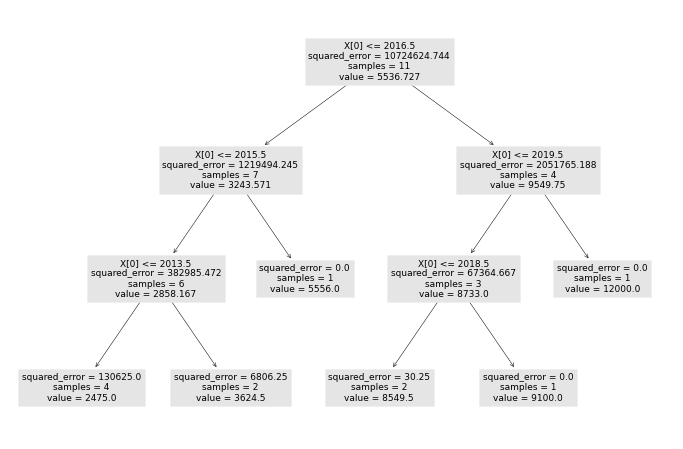

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
plot_tree(regressor, ax = ax);
plt.show()

# Random Forest Regression
Random Forest and Decision Trees are very similiar. A random Forest is basically a collection of multiple Decision Trees which can be seperated by bootstrapping (ie splitting training data and/or different features in multiple trees). It comes with small disadvantages (slower, more complex and harder to visualize), but it will be more accurate and will avoid overfitting a single deicision tree because you can split features. Since we have a very simple dataset here with only 1 independent variable, we won't see any difference in the result but i still wanted to show how to apply the model in theory (without any arguments tho).

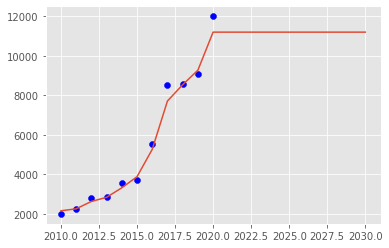

In [13]:
from sklearn.ensemble import RandomForestRegressor

# RANDOM FOREST MODEL
regressor = RandomForestRegressor()
regressor.fit(np_years, np_sales)

plt.scatter(years, sales, color = "blue")
plt.plot(prediction, regressor.predict(np_prediction));